In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="Downloading package") 

In [2]:
df=pd.read_csv("Desktop/amazon_review_full_csv/train.csv")

In [3]:
df.head()

,3,more like funchuck,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
0,5,Inspiring,I hope a lot of people hear this cd. We need m...
1,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
3,5,Too good to be true,Probably the greatest soundtrack in history! U...
4,5,There's a reason for the price,"There's a reason this CD is so expensive, even..."


In [4]:
df.tail()

,3,more like funchuck,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
2999994,1,Don't do it!!,The high chair looks great when it first comes...
2999995,2,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
2999996,2,"compact, but hard to clean","We have a small house, and really wanted two o..."
2999997,3,Hard to clean!,I agree with everyone else who says this chair...
2999998,1,what is it saying?,not sure what this book is supposed to be. It ...


In [5]:
df.columns=['Rating', 'Title', 'Review']

In [6]:
df

,Rating,Title,Review
0,5,Inspiring,I hope a lot of people hear this cd. We need m...
1,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
3,5,Too good to be true,Probably the greatest soundtrack in history! U...
4,5,There's a reason for the price,"There's a reason this CD is so expensive, even..."
...,...,...,...
2999994,1,Don't do it!!,The high chair looks great when it first comes...
2999995,2,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
2999996,2,"compact, but hard to clean","We have a small house, and really wanted two o..."
2999997,3,Hard to clean!,I agree with everyone else who says this chair...


In [7]:
df.shape

(2999999, 3)

In [8]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows', duplicate_rows_df.shape)

number of duplicate rows (0, 3)


In [9]:
df.isnull().sum()

Rating     0
Title     76
Review     0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

Rating    0
Title     0
Review    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999923 entries, 0 to 2999998
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Rating  int64 
 1   Title   object
 2   Review  object
dtypes: int64(1), object(2)
memory usage: 91.6+ MB


<Axes: xlabel='Rating'>

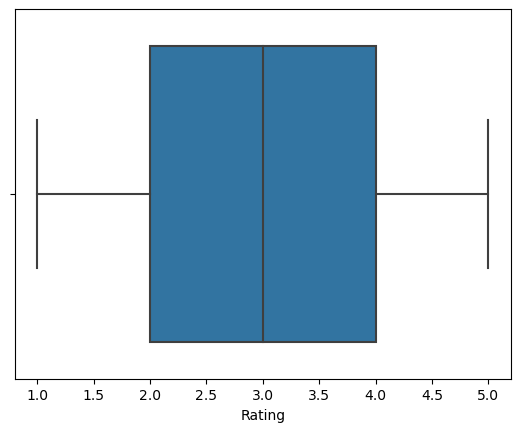

In [13]:
sns.boxplot(data=df, x="Rating")

In [14]:
df.describe()

,Rating
count,2.999923e+06
mean,3.000008e+00
std,1.414220e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,4.000000e+00
max,5.000000e+00


<Axes: xlabel='Rating', ylabel='count'>

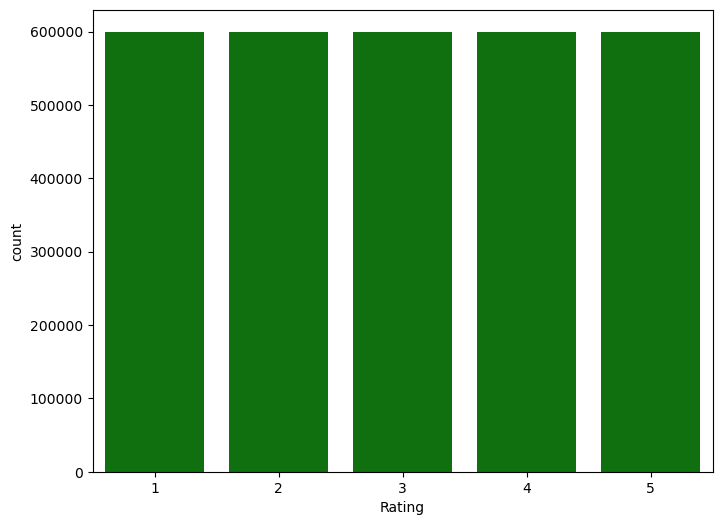

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, color='green')

/var/folders/qd/zln2cqhs3972ntg4tzx06y7w0000gn/T/ipykernel_10474/587298103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['Review'].apply(lambda x: len(str(x)))


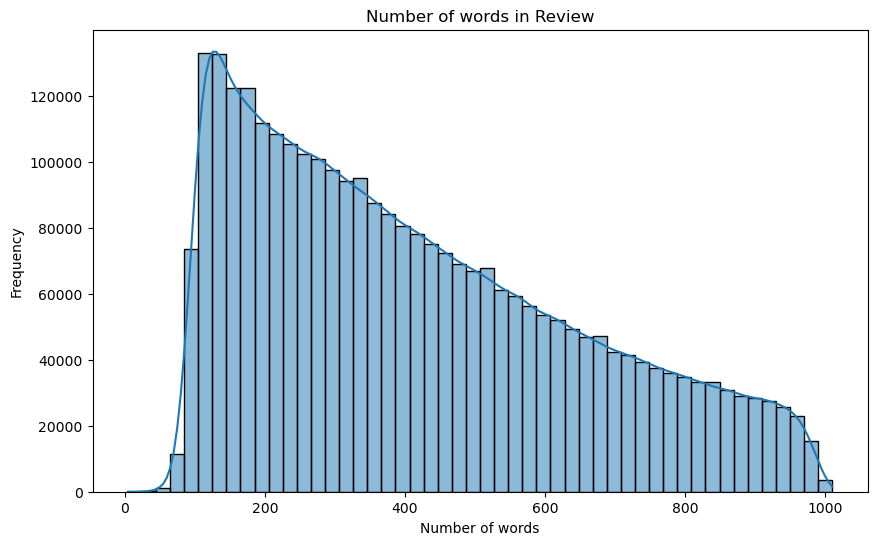

In [16]:
#The length of review text
df['text_length'] = df['Review'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Number of words in Review')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Function to clean the text
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

In [18]:
df['clean_text'] = df['Review'].apply(clean_text)

/var/folders/qd/zln2cqhs3972ntg4tzx06y7w0000gn/T/ipykernel_10474/1955788597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['Review'].apply(clean_text)


In [19]:
# Function for tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [20]:
df['tokens'] = df['clean_text'].apply(tokenize_text)

/var/folders/qd/zln2cqhs3972ntg4tzx06y7w0000gn/T/ipykernel_10474/762440392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['clean_text'].apply(tokenize_text)


In [21]:
# Function for removing stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

In [22]:
df['tokens'] = df['tokens'].apply(remove_stopwords)

/var/folders/qd/zln2cqhs3972ntg4tzx06y7w0000gn/T/ipykernel_10474/4112168760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(remove_stopwords)


In [23]:
# Function for stemming
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [24]:
df['tokens'] = df['tokens'].apply(stem_text)

/var/folders/qd/zln2cqhs3972ntg4tzx06y7w0000gn/T/ipykernel_10474/3972625258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(stem_text)


In [25]:
print(df[['Review', 'clean_text', 'tokens']].head())

                                              Review  \
0  I hope a lot of people hear this cd. We need m...   
1  I'm reading a lot of reviews saying that this ...   
2  The music of Yasunori Misuda is without questi...   
3  Probably the greatest soundtrack in history! U...   
4  There's a reason this CD is so expensive, even...   

                                          clean_text  \
0  i hope a lot of people hear this cd we need mo...   
1  im reading a lot of reviews saying that this i...   
2  the music of yasunori misuda is without questi...   
3  probably the greatest soundtrack in history us...   
4  theres a reason this cd is so expensive even t...   

                                              tokens  
0  [hope, lot, peopl, hear, cd, need, strong, pos...  
1  [im, read, lot, review, say, best, game, sound...  
2  [music, yasunori, misuda, without, question, c...  
3  [probabl, greatest, soundtrack, histori, usual...  
4  [there, reason, cd, expens, even, version, tha..

In [27]:
data = {
    'Original Text': df['Review'],
    'Cleaned Text': df['clean_text']  
}

In [28]:
df_display = pd.DataFrame(data)
df_display

,Original Text,Cleaned Text
0,I hope a lot of people hear this cd. We need m...,i hope a lot of people hear this cd we need mo...
1,I'm reading a lot of reviews saying that this ...,im reading a lot of reviews saying that this i...
2,The music of Yasunori Misuda is without questi...,the music of yasunori misuda is without questi...
3,Probably the greatest soundtrack in history! U...,probably the greatest soundtrack in history us...
4,"There's a reason this CD is so expensive, even...",theres a reason this cd is so expensive even t...
...,...,...
2999994,The high chair looks great when it first comes...,the high chair looks great when it first comes...
2999995,I have used this highchair for 2 kids now and ...,i have used this highchair for kids now and f...
2999996,"We have a small house, and really wanted two o...",we have a small house and really wanted two of...
2999997,I agree with everyone else who says this chair...,i agree with everyone else who says this chair...
